Task 1: Data Loading and Exploration

In [ ]:
# Load the CSV file using Pandas.
import pandas as pd

df_train=pd.read_csv('mnist_train.csv')
df_test=pd.read_csv('mnist_test.csv')

df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.count()

label    60000
1x1      60000
1x2      60000
1x3      60000
1x4      60000
         ...  
28x24    60000
28x25    60000
28x26    60000
28x27    60000
28x28    60000
Length: 785, dtype: int64

In [ ]:
# Total number of samples
total=0
for i in range(10):
    print(i,df_train[df_train['label']==i]['label'].count())
    total+=df_train[df_train['label']==i]['label'].count()
print("Total",total)

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949
Total 60000


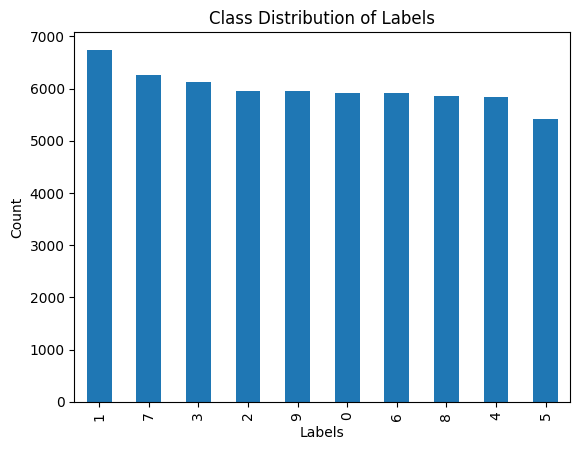

In [ ]:
# Class distribution
import matplotlib.pyplot as plt

# Plot a bar chart of the class distribution
df_train['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split features and labels

X_train = df_train.drop('label', axis=1).values
y_train = df_train['label'].values

X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

In [ ]:
# Normalize pixel values to the range [0, 1]

X_train = X_train / 255.0
X_test = X_test / 255.0

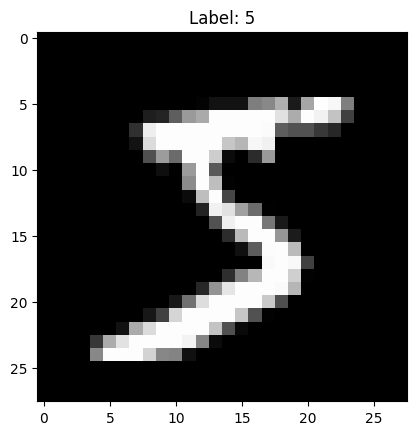

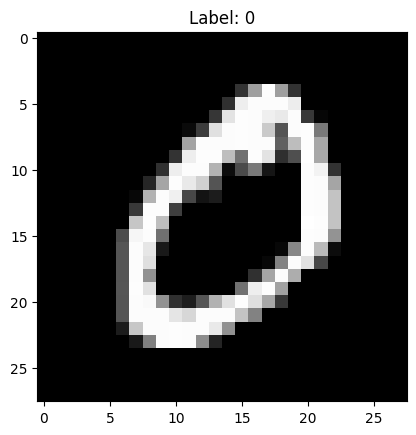

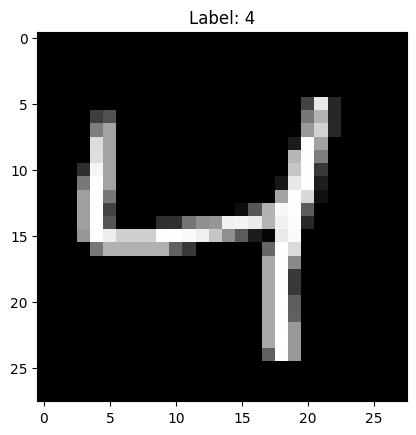

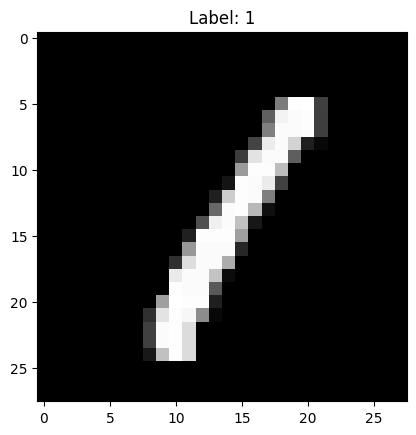

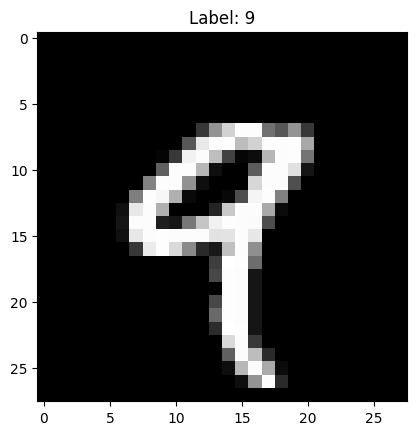

In [ ]:
# Display 5–10 sample images with their labels (reshape pixels to 28x28)
import matplotlib.pyplot as plt

for i in range(5):
    img = X_train[i].reshape(28, 28)  
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {y_train[i].item()}')
    plt.show()


In [ ]:
# Check for missing values.

print("Null in train dataset",df_train.isnull().sum().sum())
print("Null in test dataset",df_test.isnull().sum().sum())

Null in train dataset 0
Null in test dataset 0


Task 2: Data Preprocessing

In [26]:
# Already Normalized
#X_train = X_train / 255.0
#X_test = X_test / 255.0

In [ ]:
# Split the dataset into training and testing sets

print(len(X_test)/len(X_train)*100)
print(100-(len(X_test)/len(X_train)*100))

16.666666666666664
83.33333333333334


Data is split as 83.33/16.67

K-NN from scratch

In [ ]:
# Implement K-NN Classifier from scratch

import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class K_Nearest_Neighbors_Classifier():

    def __init__(self, K):
        self.K = K
        
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        m_test = X_test.shape[0]
        Y_predict = np.zeros(m_test)

        for i in range(m_test):
            # Calculate distance to ALL training samples at once
            distances = np.sqrt(np.sum((self.X_train - X_test[i])**2, axis=1))

            # Get indices of K nearest neighbors
            k_indices = np.argsort(distances)[:self.K]
            k_nearest_labels = self.Y_train[k_indices]

            # Majority vote
            lab = mode(k_nearest_labels, keepdims=True)
            Y_predict[i] = lab.mode[0]

            # Print progress every 100 images
            if i % 100 == 0:
                print(f"Processed {i}/{m_test} images", end='\r')

        return Y_predict


    
    # Find the K nearest neighbors to test 
          
    def find_neighbors( self, x ) :
        # calculate all the euclidean distances between x and X_train
        euclidean_distances = np.zeros( self.K )
        for i in range( self.K ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted

        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]
    
    # Calculate euclidean distance
            
    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

KNN = K_Nearest_Neighbors_Classifier(K=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.96880000 images
Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       

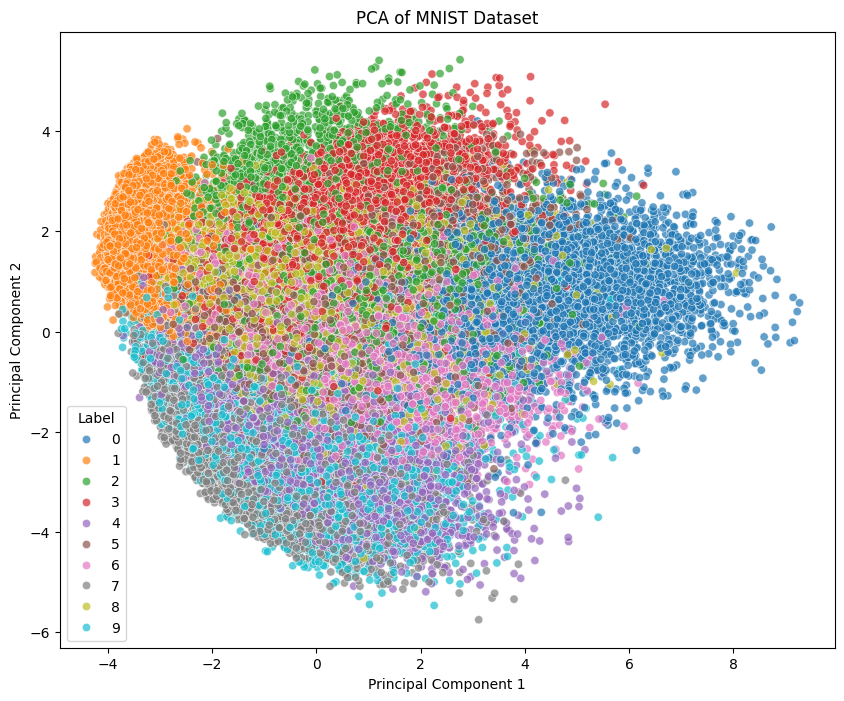

In [ ]:
# Use PCA to reduce dimensionality 

from sklearn.decomposition import PCA
import seaborn as sns


X=df_train.drop('label', axis=1) / 255.0
Test=df_test.drop('label', axis=1) / 255.0

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X)
test_principal_components = pca.fit_transform(Test)

pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pc_df['Label'] = df_train['label']

test_pc_df = pd.DataFrame(data=test_principal_components, columns=['Principal Component 1', 'Principal Component 2'])
test_pc_df['Label'] = df_test['label']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pc_df, x='Principal Component 1', y='Principal Component 2', hue='Label', palette='tab10', alpha=0.7)
plt.title('PCA of MNIST Dataset')
plt.show()

Task 3: Model Implementation

K-Nearest Neighbors (KNN)

In [ ]:
# Train KNN 
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train, y_train)
knn5.fit(X_train ,y_train)

accuracy5 = knn5.score(X_test, y_test)
accuracy3 = knn3.score(X_test, y_test)

print(f'KNN Classifier Accuracy: {accuracy5 * 100:.2f}% with 5 neighbors')
print(f'KNN Classifier Accuracy: {accuracy3 * 100:.2f}% with 3 neighbors')

KNN Classifier Accuracy: 96.88% with 5 neighbors
KNN Classifier Accuracy: 97.05% with 3 neighbors


In [ ]:
# Train KNN on PCA components

knn5 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=3)
X_train_pca = pc_df[['Principal Component 1', 'Principal Component 2']]
X_test_pca = test_pc_df[['Principal Component 1', 'Principal Component 2']]



knn3.fit(X_train_pca, y_train)
knn5.fit(X_train_pca, y_train)

accuracy5 = knn5.score(X_test_pca, y_test)
accuracy3 = knn3.score(X_test_pca, y_test)

print(f'KNN Classifier Accuracy: {accuracy5 * 100:.2f}% with 5 neighbors on PCA data')
print(f'KNN Classifier Accuracy: {accuracy3 * 100:.2f}% with 3 neighbors on PCA data')

KNN Classifier Accuracy: 43.09% with 5 neighbors on PCA data
KNN Classifier Accuracy: 41.24% with 3 neighbors on PCA data


Confusion Matrix for KNN with 5 neighbors:
 [[ 979    1    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    0 1031    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  957    1    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


<Axes: >

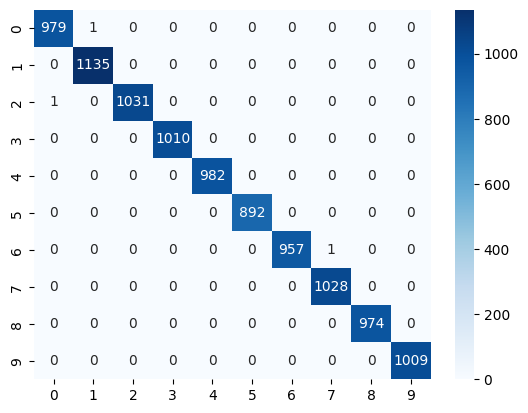

In [ ]:
#confusion matrix for KNN with 5 neighbors

from sklearn.metrics import confusion_matrix

y_pred = knn5.predict(test_pc_df)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN with 5 neighbors:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Number of misclassified images: 3


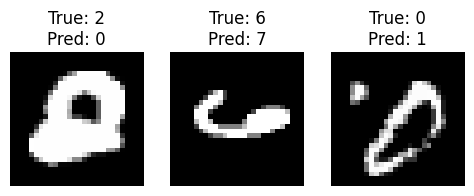

In [ ]:
#show misclassified images for KNN with 5 neighbors

misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified images: {len(misclassified_indices)}")
num_images_to_show = 5
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(1, num_images_to_show, i + 1)
    img = X_test[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {y_test[index]}\nPred: {y_pred[index]}')
    plt.axis('off')
plt.show()

In [ ]:
# tuning n_neighbors from 1 to 10

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'KNN Classifier Accuracy: {accuracy * 100:.2f}% with {k} neighbors')

KNN Classifier Accuracy: 96.91% with 1 neighbors
KNN Classifier Accuracy: 96.27% with 2 neighbors
KNN Classifier Accuracy: 97.05% with 3 neighbors
KNN Classifier Accuracy: 96.82% with 4 neighbors
KNN Classifier Accuracy: 96.88% with 5 neighbors
KNN Classifier Accuracy: 96.77% with 6 neighbors
KNN Classifier Accuracy: 96.94% with 7 neighbors
KNN Classifier Accuracy: 96.70% with 8 neighbors
KNN Classifier Accuracy: 96.59% with 9 neighbors
KNN Classifier Accuracy: 96.65% with 10 neighbors


Support Vector Machine (SVM)

SVM Classifier Accuracy: 91.70%
Confusion Matrix for SVM:
 [[ 954    0    7    1    0    6    8    2    1    1]
 [   0 1121    1    2    0    2    3    1    5    0]
 [   8   11  930   13   11    4   13   11   29    2]
 [   3    2   28  914    2   20    2   10   21    8]
 [   2    1   12    0  927    0    6    6    2   26]
 [  12    6    6   60    7  754   15    1   26    5]
 [  12    3   12    1    9   12  906    0    2    1]
 [   3    8   24   15    9    0    0  943    5   21]
 [   7   18   10   31    9   32   11    6  840   10]
 [   8    8    1   15   46    6    1   37    6  881]]


<Axes: >

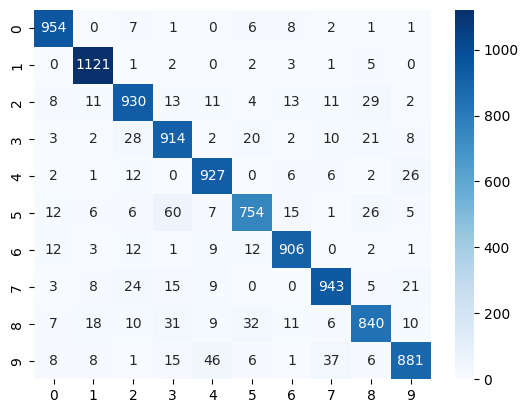

In [ ]:
# Training SVM 
from sklearn import svm
from sklearn.metrics import confusion_matrix

svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train[:10000], y_train[:10000])
svm_accuracy = svm_classifier.score(X_test, y_test)

print(f'SVM Classifier Accuracy: {svm_accuracy * 100:.2f}%') 
# confusion matrix
y_pred=svm_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVM:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Number of misclassified images: 830


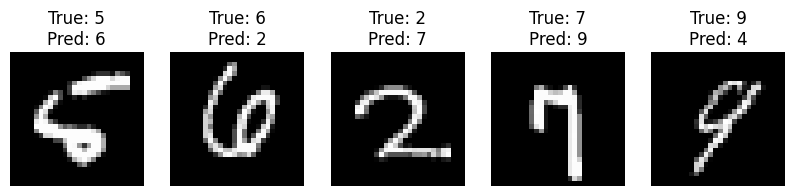

In [33]:
# show misclassified images for SVM
misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified images: {len(misclassified_indices)}")
num_images_to_show = 5
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(1, num_images_to_show, i + 1)
    img = X_test[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {y_test[index]}\nPred: {y_pred[index]}')
    plt.axis('off')
plt.show()

In [ ]:
# Training SVM with PCA components
from sklearn import svm

X_train_pca = pc_df[['Principal Component 1', 'Principal Component 2']]
X_test_pca = test_pc_df[['Principal Component 1', 'Principal Component 2']]
knn3.fit(X_train_pca, y_train) 


svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)
svm_accuracy = svm_classifier.score(X_test_pca, y_test)
print(f'SVM Classifier Accuracy: {svm_accuracy * 100:.2f}% with PCA') 

SVM Classifier Accuracy: 44.79% with PCA


In [ ]:
# Tune SVM hyperparameters (C,gamma)
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1], 
			'gamma': [1, 0.1]} 

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train[:10000], y_train[:10000])


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.113 total time= 1.2min
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.113 total time=  58.6s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.113 total time=  48.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.113 total time=  47.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.113 total time=  47.4s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.305 total time=  45.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.311 total time=  57.6s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.297 total time= 1.3min
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.293 total time= 1.2min
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.302 total time= 1.0min
[CV 1/5] END ......................C=1, gamma=1;, score=0.172 total time= 1.3min
[CV 2/5] END ......................C=1, gamma=1;,

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1], 'gamma': [1, 0.1]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexes ar

In [ ]:
# Best parameters and best score of SVM

print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.1}
0.8599


Decision Tree

Decision Tree Classifier Accuracy: 87.89%
Confusion Matrix for Decision Tree:
 [[ 918    1    7    7    3   12   13    4    9    6]
 [   0 1086    8    5    4    8    8    5    9    2]
 [  12   10  887   28   13   11   10   28   23   10]
 [   6    6   30  865    4   41    5    8   23   22]
 [   5    5    8    8  864    9   18   12   20   33]
 [  14    7    3   44    6  746   23    4   30   15]
 [  19    3   11    3   17   27  849    0   24    5]
 [   2    9   23   18    8    4    4  931   10   19]
 [  11    4   26   43   24   30   16    9  784   27]
 [  15    4    8   19   42    8    7   20   27  859]]


<Axes: >

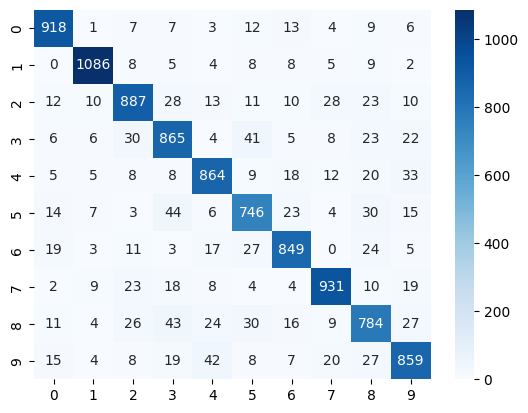

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_accuracy = dt_classifier.score(X_test, y_test)
print(f'Decision Tree Classifier Accuracy: {dt_accuracy * 100:.2f}%')

y_pred=dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


Number of misclassified images: 1211


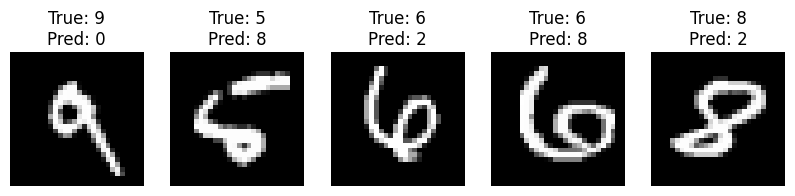

In [ ]:
# show misclassified images for Decision Tree

misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified images: {len(misclassified_indices)}")
num_images_to_show = 5
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(1, num_images_to_show, i + 1)
    img = X_test[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {y_test[index]}\nPred: {y_pred[index]}')
    plt.axis('off')
plt.show()

In [ ]:
# Training Decision Tree with PCA components

from sklearn.tree import DecisionTreeClassifier

X_train_pca = pc_df[['Principal Component 1', 'Principal Component 2']]
X_test_pca = test_pc_df[['Principal Component 1', 'Principal Component 2']]

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca, y_train)
dt_accuracy = dt_classifier.score(X_test_pca, y_test)
print(f'Decision Tree Classifier Accuracy: {dt_accuracy * 100:.2f}% with PCA')

Decision Tree Classifier Accuracy: 38.86% with PCA


In [ ]:
# Tuning Decision Tree hyperparameters (max_depth, min_samples_split) rbf

from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()
param_grid = { 'max_depth': [None, 10, 20],
               'min_samples_split': [2, 5]}
grid = GridSearchCV(dt_classifier, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_depth=None, min_samples_split=2;, score=0.873 total time=  15.1s
[CV 2/5] END max_depth=None, min_samples_split=2;, score=0.859 total time=  14.8s
[CV 3/5] END max_depth=None, min_samples_split=2;, score=0.864 total time=  15.2s
[CV 4/5] END max_depth=None, min_samples_split=2;, score=0.865 total time=  14.0s
[CV 5/5] END max_depth=None, min_samples_split=2;, score=0.880 total time=  14.6s
[CV 1/5] END max_depth=None, min_samples_split=5;, score=0.871 total time=  13.9s
[CV 2/5] END max_depth=None, min_samples_split=5;, score=0.860 total time=  14.6s
[CV 3/5] END max_depth=None, min_samples_split=5;, score=0.861 total time=  15.3s
[CV 4/5] END max_depth=None, min_samples_split=5;, score=0.863 total time=  14.3s
[CV 5/5] END max_depth=None, min_samples_split=5;, score=0.875 total time=  15.1s
[CV 1/5] END .max_depth=10, min_samples_split=2;, score=0.851 total time=   7.6s
[CV 2/5] END .max_depth=10, min_samples

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 :

In [ ]:
# Best parameters and best score of Decision Tree

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'min_samples_split': 2}
0.8706833333333333


Task 5: Reporting

Compare the performance of KNN, SVM, and Decision Tree.

K-Nearest Neighbors (97% Accuracy)

It Achieved the highest accuracy (around 97.05% with k=3). It effectively captures local non-linear patterns in handwriting.


Support Vector Machine (91.70% with Linear Kernel)

It Performed well but training was computationally expensive. It struggled slightly more than KNN with the complex, non-linear boundaries of some digits.


Decision Tree (87.9% Accuracy)

It struggled to generalize on the pixel-level data compared to the distance-based metrics of KNN/SVM.

Which model performed best and why?

K-Nearest Neighbors has highest accuracy as it captures local non-linear patterns in handwritting. The data must be clustered for K-NN to perform this well.

Observations on misclassified digits

Common confusion between digits as they share structural similarities like as 4 and 9, 3 and 5, 6 and 8 or 1 and 7.

Suggestions to improve performance

Using Convolution Neural Network for feature engineering to extract spatial features. Than scaling the features with high variance to improve training. Using Dimensionality Reduction Technique to reduce Dimenstion and decrease computation cost.